# Tree based ML methods

Eventually, see https://towardsdatascience.com/understanding-random-forest-58381e0602d2


In [2]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tree import DecisionTree
from random_forest import RandomForest

# The function we want to learn

In [4]:
lim1, lim2, a = 40, 20, 40

def f(x1, x2):
    val = x1**2 + x2**2 + a * np.sin(x1)
    res = np.full_like(x1, 3)
    res[val > lim1] = 1
    res[(val > lim2) & (val < lim1)] = 2
    return res

def div_line_1(x1):
    r = lim1 - x1**2 - a*np.sin(x1)
    r[r < 0] = 0
    return np.sqrt(r)

def div_line_2(x1):
    r = lim2 - x1**2 - a*np.sin(x1)
    r[r < 0] = 0
    return np.sqrt(r)

In [5]:
n_obj, n_feat = 1000, 2
trainX = np.random.random((n_obj, n_feat)) * 10
trainY = f(trainX[:, 0], trainX[:, 1])

In [6]:
def plot(model, trainX, trainY):
    n_pts, x_min, x_max = 300, 0, 10
    pts = np.linspace(x_min, x_max, num=n_pts)
    xx, yy = np.meshgrid(pts, pts)
    testX = np.concatenate((xx.flatten()[:,np.newaxis], yy.flatten()[:,np.newaxis]), axis=1)
    testY = model.predict(testX)
    
    _, ax = plt.subplots()

    img = ax.imshow(testY.reshape((n_pts, n_pts)), extent=(x_min, x_max, x_min, x_max), alpha=0.3, origin="lower")
    ax.scatter(trainX[:,0], trainX[:,1], c=trainY, cmap=img.cmap)

    ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max))
    ax.plot(pts, div_line_1(pts), color="black")
    ax.plot(pts, div_line_2(pts), color="black")

# Decision Tree

In [7]:
t = DecisionTree(max_depth=10, cut_dim="random_best", min_in_leaf=3)
t.fit(trainX, trainY)

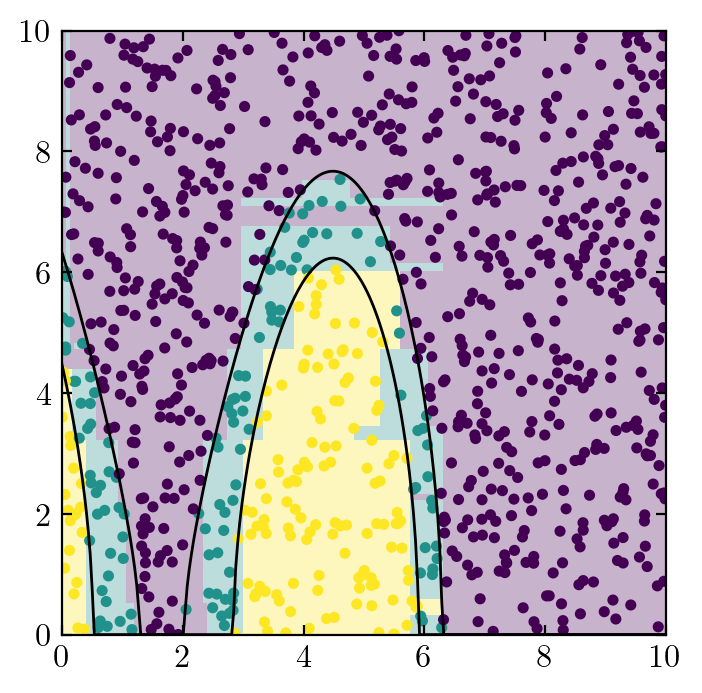

In [8]:
plot(t, trainX, trainY)

# Random Forest

In [9]:
f = RandomForest(n_trees=20, tree_config=dict(max_depth=10))
f.fit(trainX, trainY)

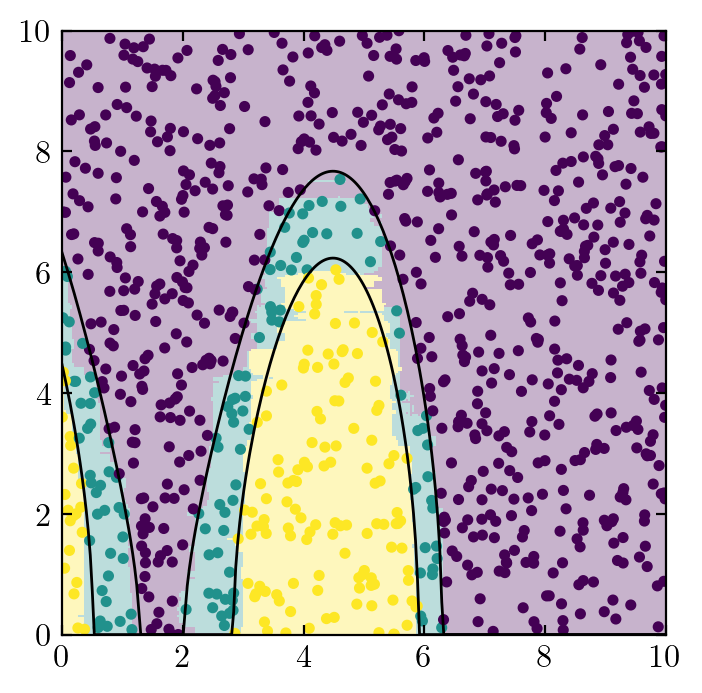

In [10]:
# Prediction of the forest
plot(f, trainX, trainY)

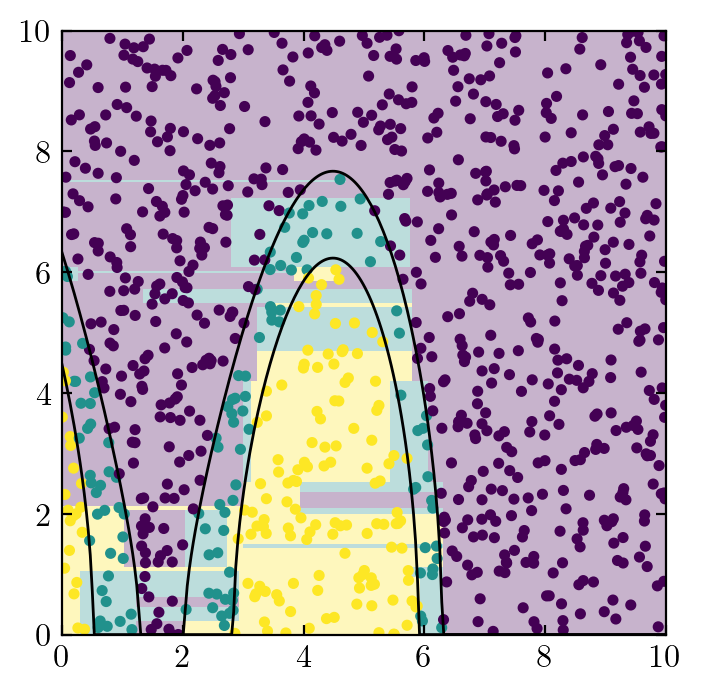

In [11]:
# The prediction of a single tree
plot(f.trees[0], trainX, trainY)